<a href="https://colab.research.google.com/github/jeungsengho/python8month/blob/main/7_%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 회귀분석(Regression)

* 독립변수(x)로 종속변수(y)를 예측하는 것을 의미
* 독립변수: 변수의 변화 원인이 모형 밖에 있는 변수
* 종속변수: 변수의 변화 원인이 모형 안에 있는 변수

In [2]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)

In [3]:
from sklearn.datasets import load_boston

In [4]:
data = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [5]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

In [7]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


* CRIM: 범죄율
* ZN: 25,000평방 피트 당 주거용 토지의 비율
* INDUS: 비소매(non-retail) 비즈니스 면적 비율
* CHAS: 찰스 강 더미 변수(통로가 하천을 향하면 1, 그렇지 않으면 0)
* NOX: 산화 질소 농도(천만 분의 1)
* RM: 주거 당 평균 객실 수
* AGE: 1940년 이전에 건축된 자가 소유 점유 비율
* DIS: 5개의 보스턴 고용 센터까지의 가중 거리
* RAD: 고속도로 접근성 지수
* TAX: 10,000달러 당 전체 가치 재산 비율
* PTRATIO: 도시 별 학생, 교사 비율
* B: 1000(Bk-0.63)^2 여기서 Bk는 도시 별 검정 비율
* LSTAT: 인구의 낮은 지위
* MEDV: 자가 주택의 중앙값(1,000달러 단위)

In [8]:
df['MEDV'] = data['target']

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_valid, y_train, y_valid = train_test_split(df.drop('MEDV', 1), df['MEDV'], test_size=0.2, random_state=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [13]:
x_train.shape, x_valid.shape

((404, 13), (102, 13))

In [14]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
50,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45
367,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33
34,1.61282,0.0,8.14,0.0,0.538,6.096,96.9,3.7598,4.0,307.0,21.0,248.31,20.34
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
172,0.13914,0.0,4.05,0.0,0.510,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69


In [15]:
y_train.head()

50     19.7
367    23.1
34     13.5
78     21.2
172    23.1
Name: MEDV, dtype: float64

In [16]:
# 광고에 따른 클릭수
import matplotlib.pyplot as plt

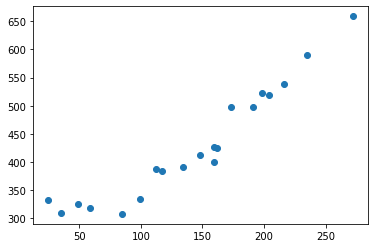

In [17]:
click = pd.read_csv('click.csv')
plt.plot(click.x, click.y, 'o')
# 광고비가 200원일 때 대략 500번 클릭율이 나오는 것을 알 수 있음
# 데이터를 읽어 학습하고 예측값을 찾는 것 -> 머신러닝

In [18]:
# y = ax + b (a: 기울기, b: y절편) (weight, bias)
# 최소 제곱법: 각각의 오차값들의 합을 내서 다음번 오차값들과 비교하기 위해
# 광고비 x, 광고비 y
# 59, 319
# 85, 308
# 99, 334
# 112, 387

# f(x) = 1 + 2x
# 119, 171, 199, 225

# y = f(x) 이상적인 형태
# y - f(x) = 0    목표: 모든 점에 생기는 오차의 합계가 가장 작아지도록 함

# 2. 평가 지표 만들기

### 2-1. MSE(Mean Squared Error)
* 예측값과 실제값의 차이에 대한 제곱에 대하여 평균을 낸 값
*${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

### 2-2. MAE(MEan Absolute Error)
*  예측값과 실제값의 차이에 대한 절대값에 대하여 평균을 낸 값
* $(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$

### 2-3. RMSE(Root Mean Squared Error)
* 예측값과 실제값의 차이에 대한 제곱에 대하여 평균을 낸 후 루트를 씌운 값
* $\sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

In [19]:
pred = np.array([3, 4, 5])
actual = np.array([1, 2, 3])

In [20]:
def my_mse(pred, actual):
  return ((pred - actual)**2).mean()

In [21]:
my_mse(pred, actual)

4.0

In [22]:
def my_mae(pred, actual):
  return np.abs(pred - actual).mean()

In [23]:
my_mae(pred, actual)

2.0

In [24]:
def my_rmse(pred, actual):
  return np.sqrt(my_mse(pred, actual))

In [25]:
my_rmse(pred, actual)

2.0

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [27]:
my_mae(pred, actual), mean_absolute_error(pred, actual)

(2.0, 2.0)

In [28]:
my_mse(pred, actual), mean_squared_error(pred, actual)

(4.0, 4.0)